In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime ,timedelta

Examinign the relationship between Family type and Customer Segment

In [ ]:
# the customer data
customer = pd.read_csv('/content/drive/My Drive/Quantium/QVI_purchase_behaviour.csv')

In [ ]:
crosstab = pd.crosstab(customer["family_type"], customer["PREMIUM_CUSTOMER"])

crosstab

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
family_type,,,
Families,9804,6408,5295
Single/Couple,10212,16358,9755
retirees,4454,6479,3872


In [ ]:
chi2, p, dof, ex = chi2_contingency(crosstab)
print(chi2, '{:.10f}'.format(p))

2157.428891675407 0.0000000000


In [ ]:
!pip install researchpy

In [ ]:
import researchpy as rp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
crosstab, test_results, expected = rp.crosstab(customer["family_type"], customer["PREMIUM_CUSTOMER"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

PREMIUM_CUSTOMER                           
PREMIUM_CUSTOMER           Budget Mainstream Premium     All
family_type                                                 
Families                    13.50       8.82    7.29   29.61
Single/Couple               14.06      22.52   13.43   50.01
retirees                     6.13       8.92    5.33   20.38
All                         33.69      40.26   26.05  100.00

In [ ]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,2157.4289
1,p-value =,0.0000
2,Cramer's V =,0.1219


Phi and Cramer's V =	Interpretation
 - 0.25 =	Very strong

 - 0.15	= Strong

 - 0.10	= Moderate

 - 0.05	= Weak

 - 0	 = No or very weak

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import norm
import math

# Pivoting the dataframe and assigning Age as the index, Status as the column headings, and percentage of respondents as the values
pivot_df = customer.pivot(index='family_type', columns='customer_segment')

Text(0.5, 1.0, 'distribution of customer segment in family types')

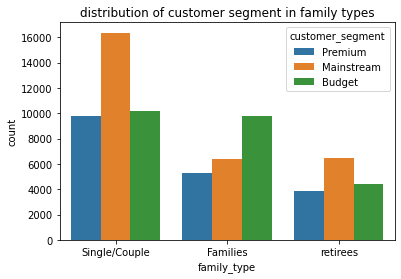

In [ ]:
sns.countplot(x='family_type',data=customer, hue='customer_segment')
plt.title('distribution of customer segment in family types')

In [ ]:
# seeing the percentage distribution of customer segment in different family types

t = customer.groupby('family_type').size().to_frame().rename(columns={0:'count'})

new = customer.groupby(['family_type','customer_segment']).size().to_frame().join(t,how='left')
new['percentage'] = new[0]/new['count']*100
new = new.reset_index()
new

,family_type,customer_segment,0,count,percentage
0,Families,Budget,9804,21507,45.585158
1,Families,Mainstream,6408,21507,29.794950
2,Families,Premium,5295,21507,24.619891
3,Single/Couple,Budget,10212,36325,28.112870
4,Single/Couple,Mainstream,16358,36325,45.032347
5,Single/Couple,Premium,9755,36325,26.854783
6,retirees,Budget,4454,14805,30.084431
7,retirees,Mainstream,6479,14805,43.762242
8,retirees,Premium,3872,14805,26.153327


**Hypothesis** -> families = budget, single/couple = mainstream, retirees are 43% mainstream. distribution of premium is same throughout

Text(0.5, 1.0, '% distribution of Family types')

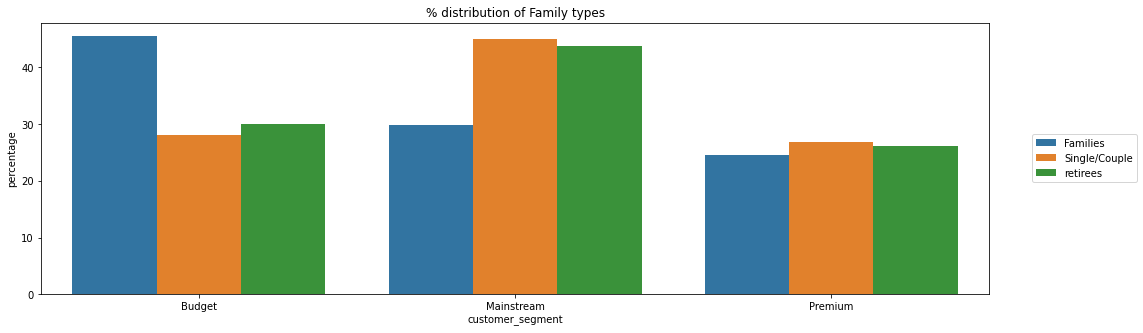

In [ ]:
plt.figure(figsize=(17,5))
sns.barplot(x='customer_segment',y='percentage',hue='family_type',data=new) # add hue to disect the view and add the legend
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5)) 
plt.title('% distribution of Family types')

Relationship between Customer segment and age group

In [ ]:
# seeing the percentage distribution of customer segment in different family types

t = customer.groupby('age_group').size().to_frame().rename(columns={0:'count'})

new = customer.groupby(['age_group','customer_segment']).size().to_frame().join(t,how='left')
new['percentage'] = new[0]/new['count']*100
new = new.reset_index()
new

,age_group,customer_segment,0,count,percentage
0,mid,Budget,1504,7275,20.673540
1,mid,Mainstream,3340,7275,45.910653
2,mid,Premium,2431,7275,33.415808
3,old,Budget,14058,39194,35.867735
4,old,Mainstream,14240,39194,36.332092
5,old,Premium,10896,39194,27.800173
6,young,Budget,8908,26168,34.041577
7,young,Mainstream,11665,26168,44.577346
8,young,Premium,5595,26168,21.381076


Text(0.5, 1.0, '% distribution of Age Group')

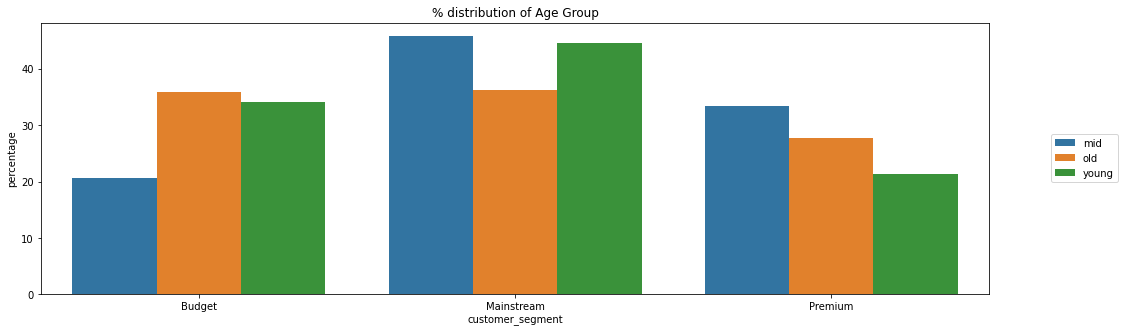

In [ ]:
plt.figure(figsize=(17,5))
sns.barplot(x='customer_segment',y='percentage',hue='age_group',data=new) # add hue to disect the view and add the legend
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5)) 
plt.title('% distribution of Age Group')
# old and young < mid in premium vice versa in budget.